# Week 6 - Assignment

## Load libraries

In [22]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
%matplotlib inline

## Task 1

Create a histogram for the Team Score/metric with the 262,144 possible combinations of vehicle configurations. Then, establish a threshold on the histogram that significantly reduces the possible configurations

In [23]:
ga = pd.read_csv('./data/f1clash-general-attributes.csv')
ga.dtypes

name                 object
speed                 int64
cornering             int64
power_unit            int64
reliability           int64
avg_pitstop_time    float64
category             object
dtype: object

In [24]:
ga.count()

name                48
speed               48
cornering           48
power_unit          48
reliability         48
avg_pitstop_time    48
category            48
dtype: int64

In [25]:
# Calculate team score
ga['team_score'] = ga['speed'] + ga['cornering'] + ga['power_unit'] + ga['reliability'] + ga['avg_pitstop_time']/0.02

# First lines
ga.head()

,name,speed,cornering,power_unit,reliability,avg_pitstop_time,category,team_score
0,Breakes Wildcore,36,23,33,22,0.59,Breaks,143.5
1,Breakes Suspense,20,32,23,21,0.37,Breaks,114.5
2,Breakes The Warden,26,28,27,25,0.43,Breaks,127.5
3,Breakes Onyx,26,23,25,50,0.49,Breaks,148.5
4,Breakes Axiom,14,34,18,15,0.67,Breaks,114.5


In [26]:
# Categorize
categories = ga['category'].unique()
categories

array(['Breaks', 'GearBox', 'Rear Wing', 'Front Wing', 'Suspension',
       'Engine'], dtype=object)

In [27]:
ga.columns

Index(['name', 'speed', 'cornering', 'power_unit', 'reliability',
       'avg_pitstop_time', 'category', 'team_score'],
      dtype='object')

In [28]:
# Build a dictionary whose keys are the categories and values its items
groups = {category: [
    raw[0] for raw in ga[ga['category'] == category].values
] for category in categories}

print('# elements:', sum([len(groups[key]) for key, value in groups.items()]))

# elements: 48


In [29]:
# All combinations of Breaks x GearBox x Rear Wing x Front Wing x Suspension x Engine
combinations = list(itertools.product(*groups.values()))
combinations = [list(combination) for combination in combinations]
len(combinations)

262144

In [30]:
# DataFrame with all possible combinations of setups
setups = pd.DataFrame(
    data=combinations,
    columns = [item.lower().replace(' ', '_') for item in categories]
)

# Displays first lines
setups.head()

,breaks,gearbox,rear_wing,front_wing,suspension,engine
0,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Cloudroar
1,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Avalanche
2,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine The Rover
3,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Twinburst
4,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Enigma


In [31]:
# Creates a copy of dataset
temp = setups.copy()

# First, create a dictionary for associate 'name' and its 'team_score'
name_to_team_score = ga.set_index('name')['team_score'].to_dict()

# Then, apply map function for each column in setups
for column in ['breaks', 'gearbox', 'rear_wing', 'front_wing', 'suspension', 'engine']:
    temp[column] = temp[column].map(name_to_team_score)

# Finally, create a column 'sum_team_score' in setups thats sum up all columns of temp
setups['sum_team_score'] = temp[['breaks', 'gearbox', 'rear_wing', 'front_wing', 'suspension', 'engine']].sum(axis=1)

# Displays dataframe
temp.head()

,breaks,gearbox,rear_wing,front_wing,suspension,engine
0,143.5,100.0,152.5,148.5,132.5,154.5
1,143.5,100.0,152.5,148.5,132.5,119.5
2,143.5,100.0,152.5,148.5,132.5,130.5
3,143.5,100.0,152.5,148.5,132.5,105.5
4,143.5,100.0,152.5,148.5,132.5,111.5


In [32]:
setups.head()

,breaks,gearbox,rear_wing,front_wing,suspension,engine,sum_team_score
0,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Cloudroar,831.5
1,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Avalanche,796.5
2,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine The Rover,807.5
3,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Twinburst,782.5
4,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Enigma,788.5


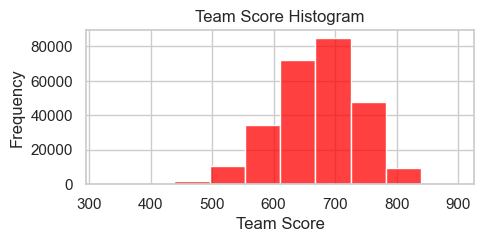

In [33]:
# Histogram of team_score
plt.figure(figsize=(5, 2))
sns.histplot(setups['sum_team_score'], bins=10, color='red')

# Plot histogram
plt.xlabel('Team Score')
plt.ylabel('Frequency')
plt.title('Team Score Histogram')
plt.show()

## Task 2

Use the filter from Task 01 and the NetworkX library to create a graph similar to the one shown on Slide 13. Choose whether the size of the vertices will be proportional to the Team Score (red vertices) or to the Out Degree of the cards (black vertices).

In [34]:
# Histogram cutoff
setups = setups[setups['sum_team_score'] > 880]
setups

,breaks,gearbox,rear_wing,front_wing,suspension,engine,sum_team_score
4112,Breakes Wildcore,GearBox Vector,Rear Wing Typhoon,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,892.0
4176,Breakes Wildcore,GearBox Vector,Rear Wing Typhoon,Front Wing Thunderclap,Suspension Horizon,Engine Cloudroar,883.0
4624,Breakes Wildcore,GearBox Vector,Rear Wing Transcendence,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,885.0
102400,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Cloudroar,884.0
102416,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,897.0
102480,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Thunderclap,Suspension Horizon,Engine Cloudroar,888.0
102544,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Trailblazer,Suspension Horizon,Engine Cloudroar,883.0
102928,Breakes Onyx,GearBox Vector,Rear Wing Transcendence,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,890.0
102992,Breakes Onyx,GearBox Vector,Rear Wing Transcendence,Front Wing Thunderclap,Suspension Horizon,Engine Cloudroar,881.0
110608,Breakes Onyx,GearBox Verdict,Rear Wing Typhoon,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,882.0


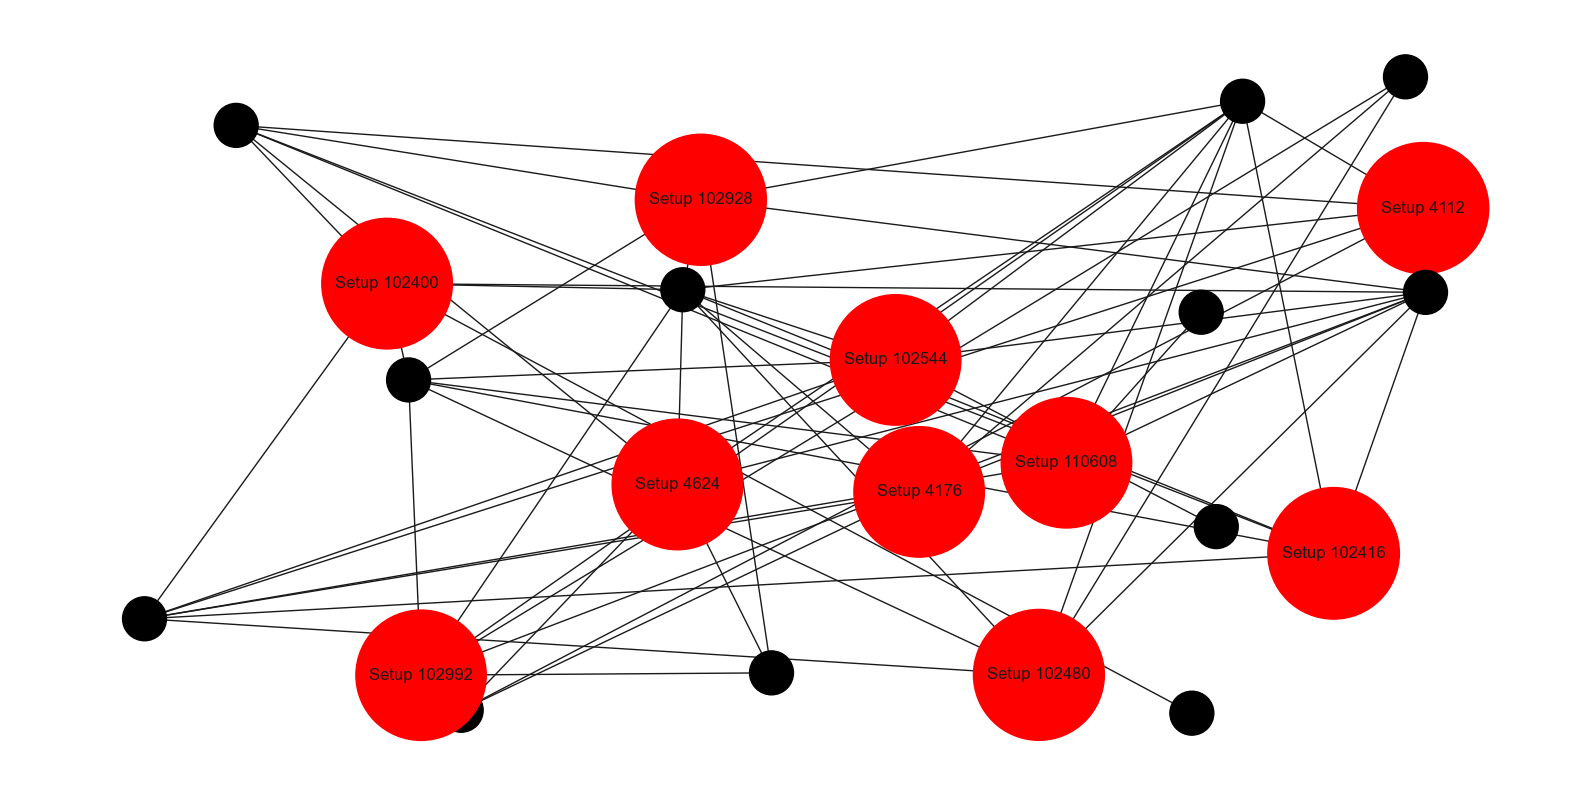

In [35]:
nodes = dict()

# Create links
for index, row in setups.iterrows():
    nodes[index] = [
        row["breaks"], 
        row["gearbox"], 
        row["rear_wing"], 
        row["front_wing"], 
        row["suspension"], 
        row["engine"]]
        
# Built graph
S = nx.DiGraph()
for node, neighbors in nodes.items():
    S.add_node(node)
    S.add_edges_from([(neighbor, node) for neighbor in neighbors])

# Size proportional to Team Score
color_map = []
node_sizes = {}
node_labels = {}
for node in S.nodes():
    if isinstance(node, int):
        node_sizes[node] = 10*setups.loc[int(node)]['sum_team_score']
        node_labels[node] = f"Setup {node}"
        color_map.append("red")
    else:
        node_sizes[node] = 1000
        # node_labels[node] = f"{node}"
        color_map.append("black")

# Plot graph
pos = nx.random_layout(S, seed=45) 
# pos = nx.shell_layout(S) 
fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx_nodes(S, pos, node_size=[node_sizes[node] for node in S.nodes()], node_color=color_map)
nx.draw_networkx_edges(S, pos)
nx.draw_networkx_labels(S, pos, labels=node_labels)

plt.axis('off')
plt.show()

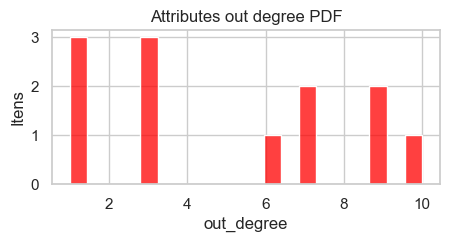

In [36]:
# Filter only nodes relative to attributes
out_degrees = [d for n, d in S.out_degree() if not isinstance(n, int)]

# Plot PDF
sns.set(style="whitegrid")
plt.figure(figsize=(5, 2))
sns.histplot(out_degrees, kde=False, color="red", bins=20)
plt.xlabel("out_degree")
plt.ylabel("Itens")
plt.title("Attributes out degree PDF")
plt.show()

## Task 3

Create a bipartite graph for the F1 Clash game's bottles and their corresponding properties, with two groups: Bottles and Properties. The size of the Property vertices will be proportional to the out-degree of the vertices.

In [37]:
boosts = pd.read_csv('./data/f1clash-boosts.csv')
boosts.head()

,name,defending,tyre_management,reliability,pit_stop_times,cornering,power_unit,speed,race_start,overtaking
0,Tsar,10.0,25.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN
1,Frost,NaN,25.0,10.0,NaN,NaN,NaN,NaN,15.0,NaN
2,Tulip,10.0,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN
3,Dragon,NaN,15.0,NaN,NaN,NaN,15.0,NaN,NaN,20.0
4,Kawaii,NaN,NaN,NaN,15.0,20.0,NaN,NaN,15.0,NaN


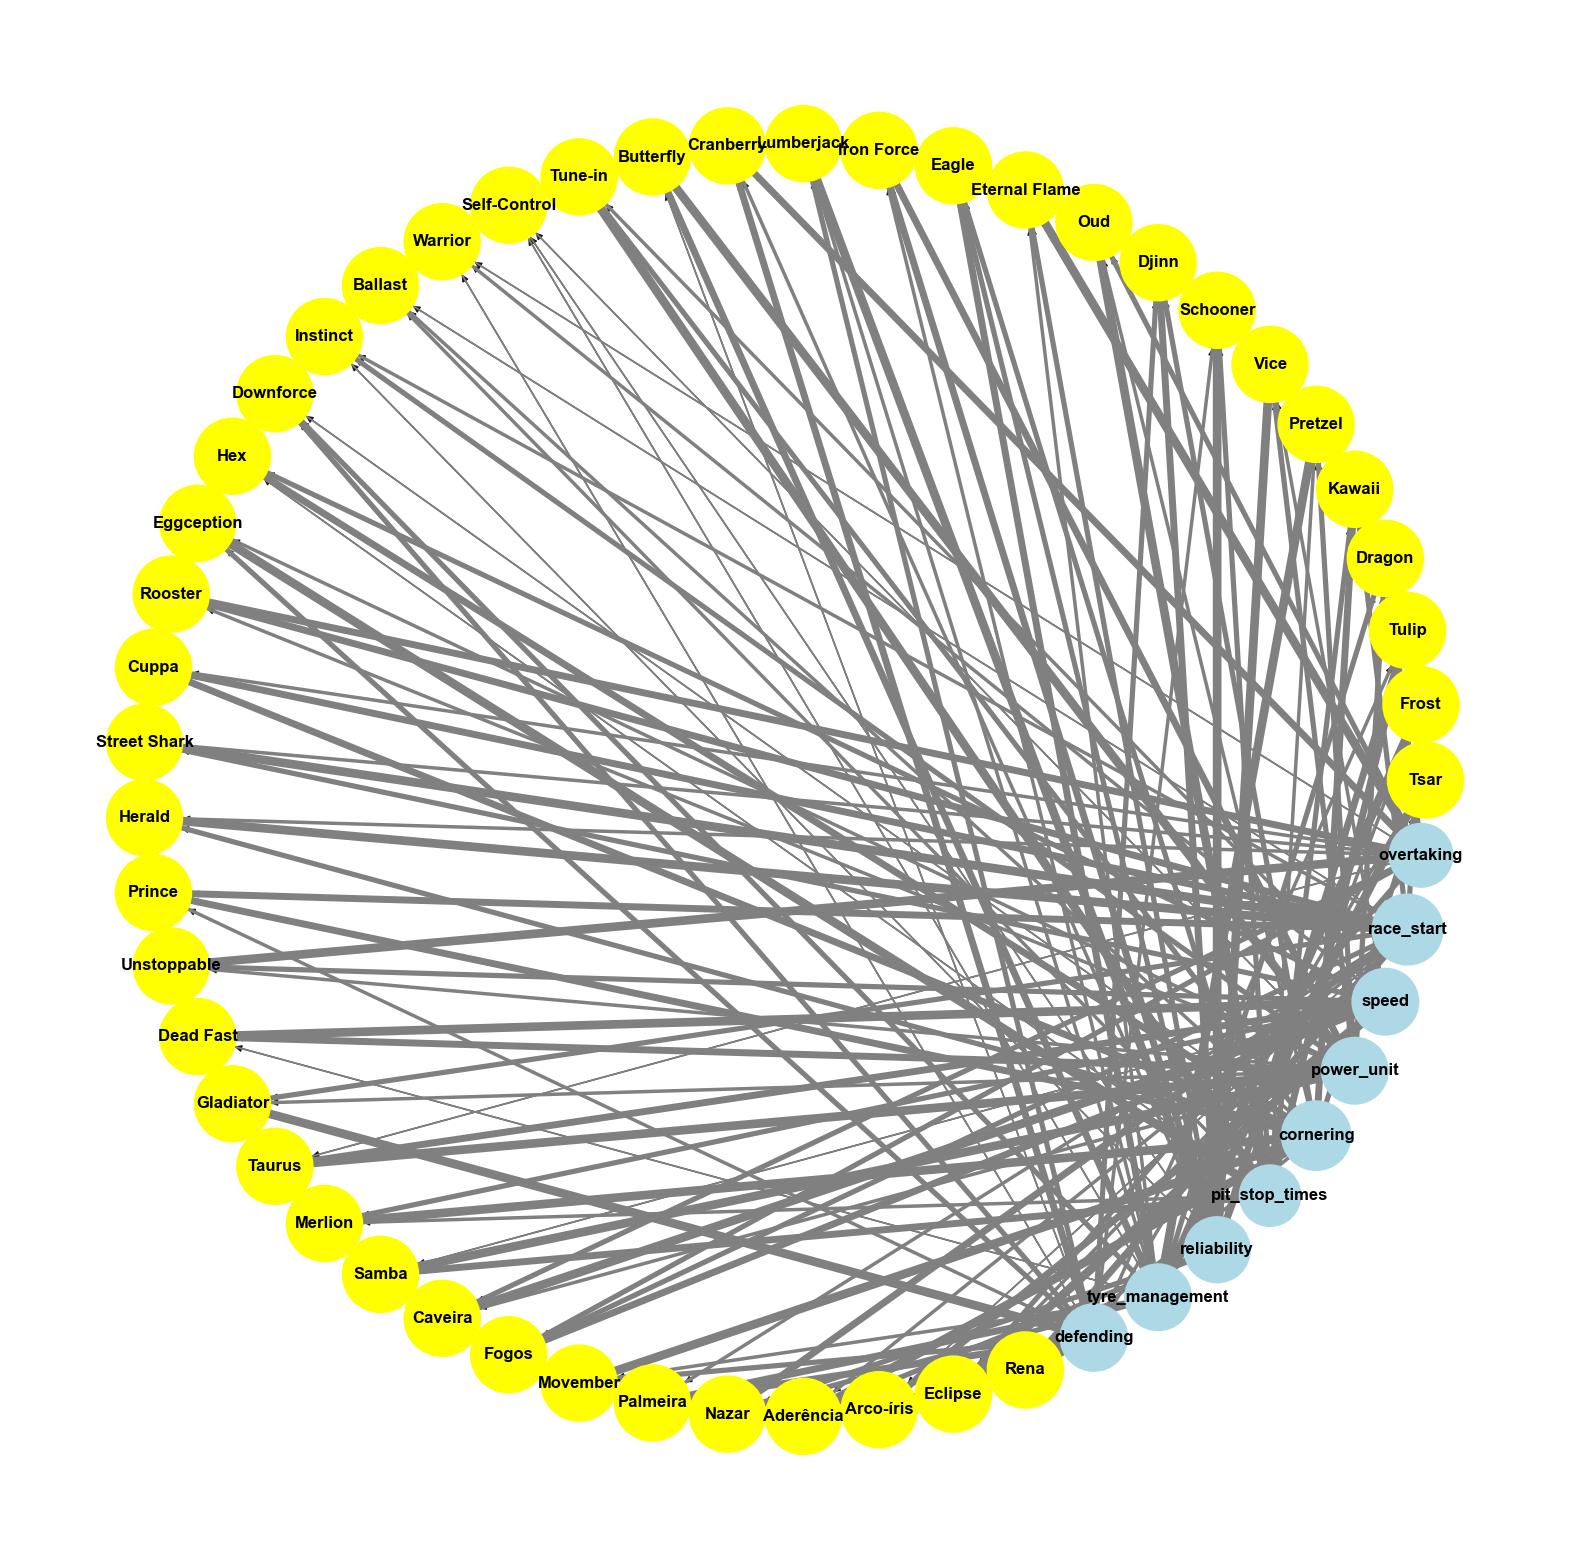

In [38]:
import nxviz as nv
from nxviz import annotate, highlights
from nxviz.plots import despine, rescale, respine

def create_graph_bipartite_for_boosts(boosts):
    # Create links
    nodes = dict()
    for index, row in boosts.iterrows():
        neighbors = []
        if (not math.isnan(row["defending"])):
            neighbors.append("defending")
        if (not math.isnan(row["tyre_management"])): 
            neighbors.append("tyre_management")
        if (not math.isnan(row["reliability"])): 
            neighbors.append("reliability")
        if (not math.isnan(row["pit_stop_times"])):
            neighbors.append("pit_stop_times")
        if (not math.isnan(row["cornering"])):
            neighbors.append("cornering")
        if (not math.isnan(row["power_unit"])):
            neighbors.append("power_unit")
        if (not math.isnan(row["speed"])):
            neighbors.append("speed")        
        if (not math.isnan(row["race_start"])):
            neighbors.append("race_start")        
        if (not math.isnan(row["overtaking"])):
            neighbors.append("overtaking")        
        nodes[row["name"]] = neighbors
            
    # Built graph
    B = nx.DiGraph()

    # Bipartite setup
    B.add_nodes_from(boosts['name'].unique(),bipartite=0, group="Boosts")
    B.add_nodes_from(boosts.columns[1:], bipartite=1, group="Attributes")

    # Add weightned edges
    for node, neighbors in nodes.items():
        B.add_node(node)
        B.add_weighted_edges_from([(neighbor, node, boosts.loc[boosts['name'] == node, neighbor].iloc[0]) for neighbor in neighbors])

    # Size of boosts proportional to out degree sum
    color_map = []
    node_sizes = {}
    for node in B.nodes():
        if node in boosts['name'].unique():
            node_sizes[node] = 3000
            color_map.append("yellow")
        else:
            total_degree = sum(d["weight"] for _, _, d in B.edges(node, data=True))
            node_sizes[node] = total_degree * 10
            color_map.append("lightblue")
    
    # Draw graph
    fig, ax = plt.subplots(figsize=(20, 20))
    pos = nx.circular_layout(B)
    nx.draw(B, pos, 
            with_labels=True, 
            node_color=color_map, 
            node_size=[node_sizes[node] for node in B.nodes()], 
            font_size=12,
            font_color='black', 
            font_weight='bold')

    # Show weights on edges
    edge_weights = [B.edges[edge]['weight'] for edge in B.edges]
    edge_options = {
        'edge_color': 'grey',
        'width': [0.25 * weight for weight in edge_weights],
    }
    edge_labels = {(u, v): d["weight"] for u, v, d in B.edges(data=True)}
    # nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_size=10)
    nx.draw_networkx_edges(B, pos, **edge_options)

    # Plot
    plt.axis('off')
    plt.show()

create_graph_bipartite_for_boosts(boosts)

## Task 4

Considering only what has been seen so far, we will propose a solution to find the best setup: Parts + Drivers + Boost. Assume that 

```
Team Score = Sum of the metrics of the 2 drivers + speed + cornering + power unit + reliability + (avg pit stop)/0.02.
```

Identify the configuration in DataFrames setups with the highest team_score


In [39]:
# Create a copy of the 'setups' DataFrame as 'setup_temp'
setup_temp = setups.copy()

# Create a dictionary mapping driver names to their corresponding 'team_score' from the 'ga' DataFrame
name_to_team_score = ga.set_index('name')['team_score'].to_dict()

# For each of the specified columns, map the 'team_score' based on the driver's name
for column in ['breaks', 'gearbox', 'rear_wing', 'front_wing', 'suspension', 'engine']:
    setup_temp[column] = setup_temp[column].map(name_to_team_score)

# Calculate the sum of 'team_score' values for each row in 'setup_temp' and add it as a new column 'sum_team_score' in 'setups'
setups['sum_team_score'] = setup_temp[['breaks', 'gearbox', 'rear_wing', 'front_wing', 'suspension', 'engine']].sum(axis=1)

# Find the index of the row with the highest 'sum_team_score'
index = setups['sum_team_score'].idxmax()

# Extract the best setup by locating the row with the highest 'sum_team_score' and store it in 'bst_setup'
bst_setup = setups.loc[[index]]

# Return the 'bst_setup' DataFrame
bst_setup

,breaks,gearbox,rear_wing,front_wing,suspension,engine,sum_team_score
102416,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,897.0


Identify the two bottles with the greatest contribution of attributes

In [40]:
# Select the numeric columns in the 'boosts' DataFrame
numeric_columns = boosts.select_dtypes(include=[float, int]).columns

# Create a copy of the 'boosts' DataFrame to keep the original intact
filtered_boosts = boosts.copy()

# For each numeric column, replace values less than or equal to 20 with NaN
for column in numeric_columns:
    filtered_boosts[column] = filtered_boosts[column].apply(lambda x: np.nan if pd.notna(x) and x <= 20 else x)

# Use uma função lambda para verificar se todas as colunas numéricas em uma linha são menores ou iguais a 20
mask = filtered_boosts.apply(lambda row: not any(row[numeric_columns] > 20), axis=1)

# Remove rows from the DataFrame based on the mask
filtered_boosts = filtered_boosts[~mask]

# Return the 'filtered_boosts' DataFrame after filtering
filtered_boosts

,name,defending,tyre_management,reliability,pit_stop_times,cornering,power_unit,speed,race_start,overtaking
0,Tsar,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Frost,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pretzel,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Vice,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Schooner,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Oud,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN
10,Eternal Flame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
13,Lumberjack,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
15,Butterfly,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
16,Tune-in,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN


Identify the two best drivers

In [41]:
# Read the driver data from the CSV file 'f1clash-drivers.csv' into a DataFrame
drivers = pd.read_csv('./data/f1clash-drivers.csv')

# Calculate the 'total_score' for each driver by summing their performance attributes
drivers['total_score'] = drivers[['overtaking', 'defending', 'qualifying', 'race_start', 'tyre_management']].sum(axis=1)

# Sort the DataFrame in descending order based on the 'total_score' column
drivers = drivers.sort_values(by='total_score', ascending=False)

# Select the top 2 drivers with the highest total scores
top_drivers = drivers.head(2)

# Print a message indicating the best drivers in the game
print("Lando Norris and Max Verstappen are the best drivers in the game.")

# Display the DataFrame 'drivers' after sorting
drivers

Lando Norris and Max Verstappen are the best drivers in the game.


,name,overtaking,defending,qualifying,race_start,tyre_management,total_score
4,Lando Norris,99.0,95.0,99.0,99.0,99.0,491.0
0,Max Verstappen,97.0,86.0,99.0,89.0,94.0,465.0
1,Charles Leclerc,93.0,99.0,97.0,87.0,89.0,465.0
2,Fernando Alonso,99.0,92.0,89.0,97.0,88.0,465.0
5,George Russel,95.0,90.0,91.0,83.0,86.0,445.0
6,Sergio Perez,85.0,96.0,89.0,91.0,84.0,445.0
7,Carlos Sainz,84.0,85.0,95.0,90.0,91.0,445.0
8,Lance Stroll,92.0,83.0,87.0,94.0,89.0,445.0
9,Pierre Gasly,88.0,93.0,83.0,85.0,96.0,445.0
3,Lewis Hamilton,81.0,86.0,89.0,94.0,90.0,440.0


Pick the best configurations

In [42]:
# Select the best boosts based on filtered_boosts
best_boosts = boosts[boosts['name'].isin(filtered_boosts['name'])]

# Create a copy of the bst_setu DataFrame
best_setup = bst_setup.copy()

# Create an empty DataFrame to store versions information
versions = pd.DataFrame({'Bottle': [], 'Total': [], 'setup_number': best_setup.index.values[0]})

# Iterate through the best_boosts DataFrame
for index, row_b in best_boosts.iterrows():
    temp_setup = {
        'Bottle': row_b['name'],
        'Total': best_setup["sum_team_score"].values[0],
        'setup_number': best_setup.index.values[0]
    }
    
    # Calculate the Total score by adding boost values
    for column in ['speed', 'cornering', 'power_unit', 'reliability']:
        if pd.notna(row_b[column]):
            temp_setup["Total"] += row_b[column]
    
    # Concatenate the temporary setup to the versions DataFrame
    versions = pd.concat([versions, pd.DataFrame([temp_setup])], ignore_index=True)

# Sort the versions DataFrame by Total score in descending order
versions = versions.sort_values(by='Total', ascending=False)

# Display the resulting DataFrame
versions


,Bottle,Total,setup_number
3,Vice,947.0,102416
16,Taurus,942.0,102416
14,Dead Fast,942.0,102416
21,Aderência,937.0,102416
17,Merlion,937.0,102416
19,Caveira,932.0,102416
18,Samba,927.0,102416
23,Eclipse,922.0,102416
4,Schooner,922.0,102416
20,Movember,922.0,102416


### Best configuration

- Setup 102416
- Lando Norris and Max Verstappen
- Bottle Vice and Taurus.